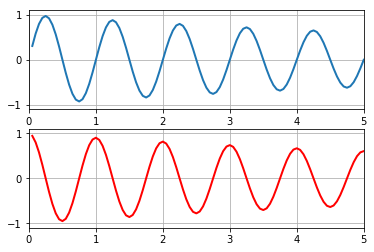

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y1, y2

data_gen.t = 0

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes initalizations as before (just now we do it for both of them)
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initialize the data arrays 
xdata, y1data, y2data = [], [], []
def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)

    # axis limits checking. Same as before, just for both axes
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
# plt.show()
HTML(ani.to_html5_video())


<Figure size 432x288 with 0 Axes>

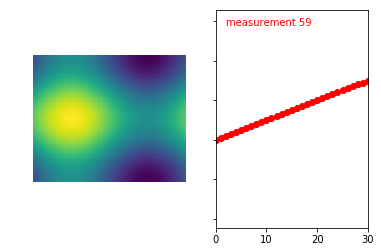

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
# plt.title(f'# of measurement acquired: {i}')
a, b = [], []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
#     fig = plt.figure()
#     ax1.set_title(f'# of measurement acquired: {i}')
    ax1.axis('off')
    im = ax1.imshow(f(x, y), animated=True)
#     ax1.set_xlim([0, 30])
#     text1 = ax1.text(5,5, f'measurement {i}',animated=True, color='white', fontsize=10)
#     
    a.append(i)
    b.append(60-i)
    im2, = ax2.plot(a, b, color='red', marker='o', markeredgecolor='r')
    text1 = ax2.text(2,2, f'measurement {i}',animated=True, color='red', fontsize=10)
    ax2.set_xlim([0, 30])
#     fig.set_title(f'# of measurement acquired: {i}')
#     plt.axis('off')
    ims.append([im, im2,text1])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
# or 
# save gif
# ani.save('animation.gif', writer='imagemagick', fps=10)

HTML(ani.to_html5_video())

# plt.show()